# P1: Nifty Neural Networks!


## Table Of Content

1. Introduction
2. Preliminaries
3. Software Setup
4. Implementation
5. Grading Rubric
6. Report guidelines

## 1. Introduction

Neural networks, at their core, function like any other mathematical function that can be evaluated. The process of evaluating a neural network is referred to as the forward pass. During this step, inputs are passed through the network layers, and outputs are generated.

To optimize the network's performance, its weights and biases need to be adjusted. This is done through a process called backward propagation (or backpropagation). In this step, the gradients of the loss function with respect to each parameter are calculated, and these gradients are subtracted from the corresponding weights and biases, allowing the network to learn and improve its predictions.

In this assignment, you will dive into the implementation of custom layers in PyTorch. Specifically, you will focus on coding the forward pass and computing the gradients necessary for the backward pass. Before you begin, make sure to review the grading rubric to understand the criteria for evaluation.

## 2. Preliminaries

### CIFAR10 Dataset

CIFAR-10 is a dataset consisting of 60000, 32×32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More details about the datset can be found [here](http://www.cs.toronto.edu/~kriz/cifar.html).

Sample images from each class of the CIFAR-10 dataset is shown below:

![CIFAR 10](./artifacts/cifar10.png)

In this project, you will classify images into these 10 classes using the provided pipeline,loaders and helper classes.

Additionally, you are expected to generate a confusion matrix to evaluate your model's performance. For guidance on plotting a confusion matrix in PyTorch, please refer to this [resource](https://stackoverflow.com/questions/74020233/how-to-plot-confusion-matrix-in-pytorch).

### Linear Layer
A linear layer in a neural network performs a linear transformation of the input data. It is defined by the following components:

1. Weights
2. Biases

More details below,

[Pytorch Linear Layer](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).

You can find information about the dimension of weights and biases in custom_layers.py

### Soft Max
The Softmax function is commonly used in neural networks for multi-class classification problems. It converts a vector of raw scores (logits) into probabilities, making it possible to interpret the output as the likelihood of each class.

[Sample implementation](https://stackoverflow.com/questions/34968722/how-to-implement-the-softmax-function-in-python)

More details [here](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html).

### Convolutional Layer

A convolutional layer is a fundamental building block in Convolutional Neural Networks (CNNs) used primarily for processing grid-like data such as images. It applies convolution operations to detect local features in the input.

Although it is called a convolutional layer, the PyTorch implementation of conv2d does not actually perform a convolution in the mathematical sense. Instead, it performs a cross-correlation operation, where the kernel is not flipped. This distinction is important to note, but for most deep learning projects including this one, cross-correlation is perfectly fine as the weights will automatically adjust during training.

For more details, refer to [P0](https://rbe549.github.io/rbe474x/fall2024a/proj/p0/).


## 3. Software Setup

Use a code editor like VSCode and open this entire folder.

For each part, you will be implementing the corresponding layers in custom_layers.py

The code will automatically be tested with test.py. 

To run the test, open a terminal in the current folder and run,

`pytest -s -v test.py`

## 4. Implementation 


### Part1 : Implement Your Custom Layers for Multi Layer Perceptron (MLP)

Open custom_layers.py and implement a fully connected, relu and softmax layer.

Verify it by running the below code. Feel free to modify the below snippet. But do not modify my test.py

For more information about supplying gradients, please refer to [examples_autograd](https://pytorch.org/tutorials/beginner/examples_autograd/two_layer_net_custom_function.html).

In [6]:
import importlib
import torch
import torch.nn as nn

import networks as net
importlib.reload(net)

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

print("\nLinear")
u = torch.rand((1, 10)).to(device)
customLayer = net.CustomLinear(10, 2).to(device)
inbuiltLayer = nn.Linear(in_features=10, out_features=2).to(device)

inbuiltLayer.weight.data.copy_(customLayer.weight.data)
inbuiltLayer.bias.data.copy_(customLayer.bias.data)

y_custom = customLayer(u)
y_inbuilt = inbuiltLayer(u)
print("Inference for linear layer")
print(y_custom)
print(y_inbuilt)

lossFunc = nn.MSELoss()

loss_in = lossFunc(y_inbuilt, torch.zeros_like(y_inbuilt))
loss_in.backward()

loss_custom = lossFunc(
    y_custom,
    torch.zeros_like(
        y_custom,
    ),
)
loss_custom.backward()


print("\ngraidents for linear layer")
print(customLayer.weight.grad)
print(inbuiltLayer.weight.grad)

print(customLayer.bias.grad)
print(inbuiltLayer.bias.grad)

# RELU
print("\nRELU")
u1 = torch.rand((1, 10), requires_grad=True)
u2 = u1.detach().clone()
u2.requires_grad_()

customLayer = net.CustomReLU()
inbuiltLayer = nn.ReLU()

y_custom = customLayer(u1)
y_inbuilt = inbuiltLayer(u2)

loss_custom = lossFunc(y_custom, torch.zeros_like(y_custom))
loss_in = lossFunc(y_inbuilt, torch.zeros_like(y_inbuilt))

loss_custom.backward()
loss_in.backward()

print("inference")
print(y_custom)
print(y_inbuilt)

print("gradients of loss relative to the input")
print(u1.grad)
print(u2.grad)

# SOFTMAX
print("\n SoftMax")

u1 = torch.rand((1, 3), requires_grad=True)
u2 = u1.detach().clone()
u2.requires_grad_()
customLayer = net.CustomSoftmax(1)
inbuiltLayer = nn.Softmax()

y_custom = customLayer(u1)
y_inbuilt = inbuiltLayer(u2)

loss_custom = lossFunc(y_custom, torch.zeros_like(y_custom))
loss_in = lossFunc(y_inbuilt, torch.zeros_like(y_inbuilt))

loss_custom.backward()
loss_in.backward()

print("gradients of loss relative to the input")
print(u1.grad)
print(u2.grad)



Linear
Inference for linear layer
tensor([[-0.2765,  0.0711]], device='cuda:0',
       grad_fn=<CustomLinearLayerBackward>)
tensor([[-0.2765,  0.0711]], device='cuda:0', grad_fn=<AddmmBackward0>)

graidents for linear layer
tensor([[-0.2594, -0.0295, -0.1647, -0.1985, -0.1075, -0.2076, -0.0813, -0.1352,
         -0.0217, -0.2114],
        [ 0.0667,  0.0076,  0.0424,  0.0511,  0.0277,  0.0534,  0.0209,  0.0348,
          0.0056,  0.0544]], device='cuda:0')
tensor([[-0.2594, -0.0295, -0.1647, -0.1985, -0.1075, -0.2076, -0.0813, -0.1352,
         -0.0217, -0.2114],
        [ 0.0667,  0.0076,  0.0424,  0.0511,  0.0277,  0.0534,  0.0209,  0.0348,
          0.0056,  0.0544]], device='cuda:0')
tensor([-0.2765,  0.0711], device='cuda:0')
tensor([-0.2765,  0.0711], device='cuda:0')

RELU
inference
tensor([[0.2771, 0.5682, 0.5483, 0.2308, 0.2831, 0.4958, 0.2628, 0.3342, 0.2235,
         0.6380]], grad_fn=<CustomReLULayerBackward>)
tensor([[0.2771, 0.5682, 0.5483, 0.2308, 0.2831, 0.4958, 0.2628,

### Part 2: MLP Network Training

Now that you have implemented an MLP from scratch, it's time to train it and verify its ability to classify objects. This network is expected to achieve an accuracy of approximately 40%.

Additionally, you are required to save one of your best model checkpoints as mlp.pth in the current folder. This file will be used for automated testing.

Furthermore, please implement a confusion matrix in the utils file, specifically within the val_step method of the Pipeline class. You may use any available implementation of the confusion matrix, but ensure that all tests continue to pass.

True
Files already downloaded and verified
Files already downloaded and verified
Epoch count:  0
0 3403.2863425016403 31.59
Epoch count:  1
1 3335.0237004756927 33.3
Epoch count:  2
2 3301.7874916791916 34.75
Epoch count:  3
3 3274.080115556717 35.99
Epoch count:  4
4 3250.849272251129 36.72
Epoch count:  5
5 3227.7775896787643 37.84
Epoch count:  6
6 3207.712581753731 38.38
Epoch count:  7
7 3186.5939127206802 39.33
Epoch count:  8
8 3168.3960651159286 40.01
Epoch count:  9
9 3150.4814710617065 40.22
Epoch count:  10
10 3134.9193875789642 40.5
Epoch count:  11
11 3119.102735877037 41.76
Epoch count:  12
12 3103.3282340765 41.5
Epoch count:  13
13 3090.3969371318817 42.24
Epoch count:  14
14 3076.984374165535 42.43
Epoch count:  15
15 3064.8216282129288 42.27
Epoch count:  16
16 3050.998439669609 42.5
Epoch count:  17
17 3039.5265480279922 42.26
Epoch count:  18
18 3028.6879897117615 42.71
Epoch count:  19
19 3017.661252617836 42.82
Epoch count:  20
20 3006.614085674286 42.9
Epoch coun

/home/legoeuro/codeing/junior/rbe474x/.venv/lib/python3.10/site-packages/sklearn/metrics/_plot/confusion_matrix.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


21 2997.885619044304 43.19
Epoch count:  22
22 2987.0279690027237 43.25
Epoch count:  23
23 2978.2771558761597 43.29
Epoch count:  24
24 2969.3815253973007 43.11
Epoch count:  25
25 2961.2015095949173 43.68
Epoch count:  26
26 2953.048367023468 43.51
Epoch count:  27
27 2945.1967009305954 43.2
Epoch count:  28
28 2937.502911925316 43.5
Epoch count:  29
29 2931.376954436302 43.6
Epoch count:  30
30 2923.0631864070892 43.89
Epoch count:  31
31 2915.6952781677246 43.8
Epoch count:  32
32 2911.6187295913696 43.84
Epoch count:  33
33 2903.269963979721 43.31
Epoch count:  34
34 2897.7611714601517 44.31
Epoch count:  35
35 2892.2421845197678 43.85
Epoch count:  36
36 2886.6335525512695 43.8
Epoch count:  37
37 2883.2010390758514 43.84
Epoch count:  38
38 2876.3696343898773 44.12
Epoch count:  39
39 2873.5043543577194 43.68


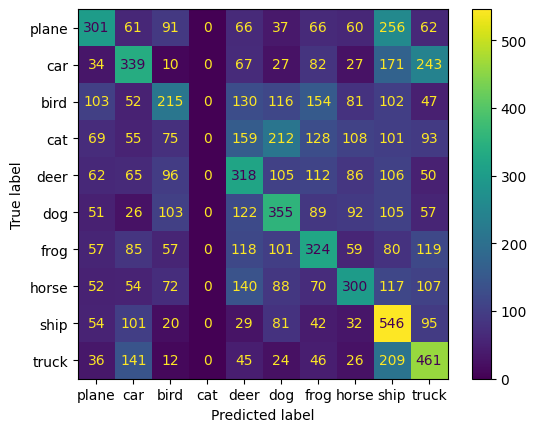

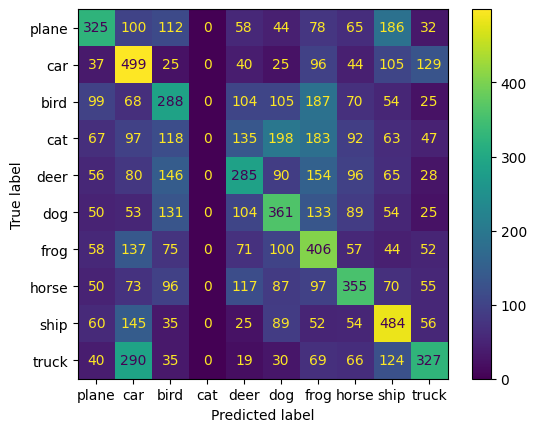

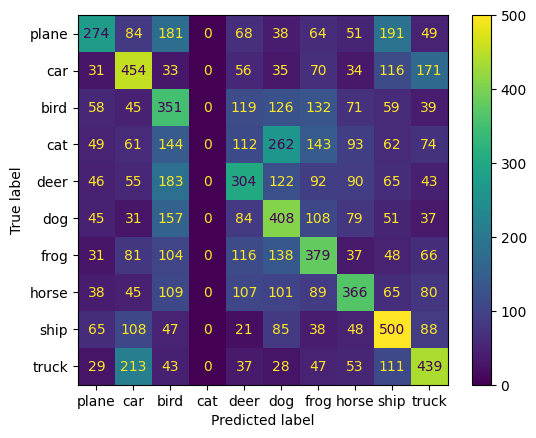

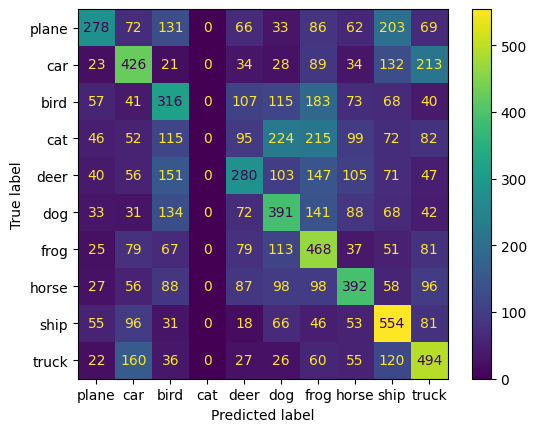

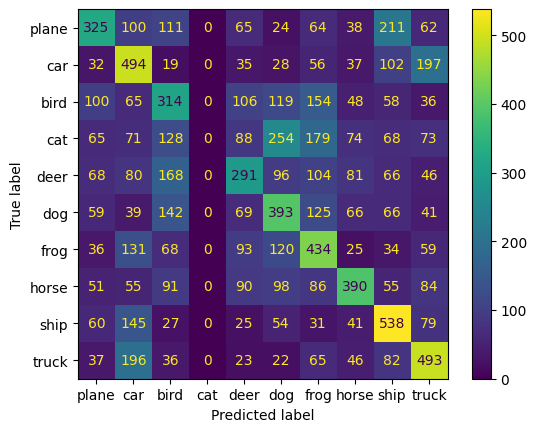

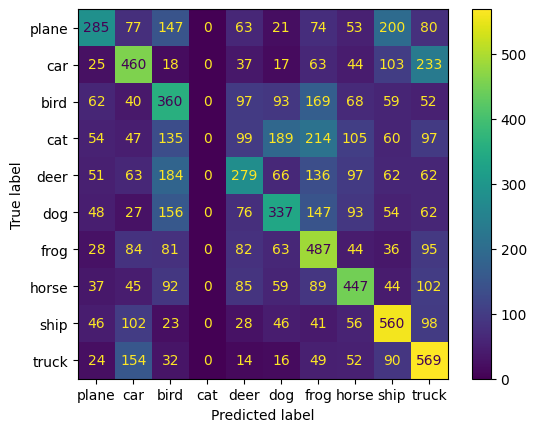

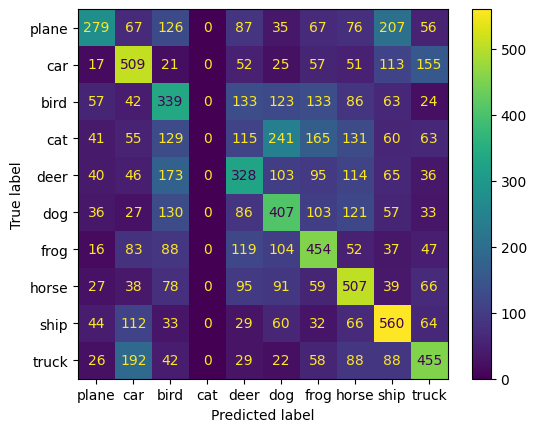

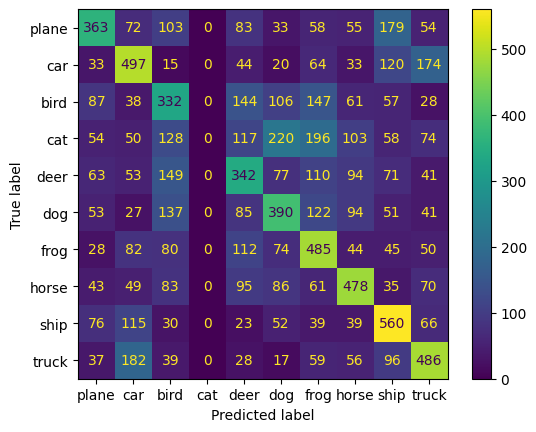

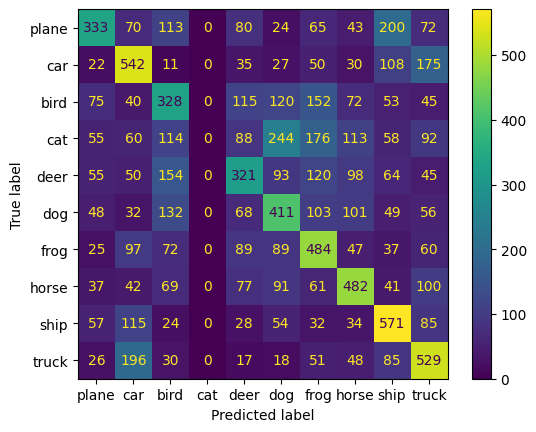

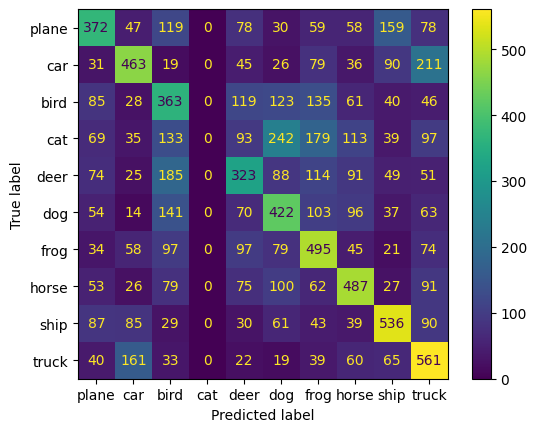

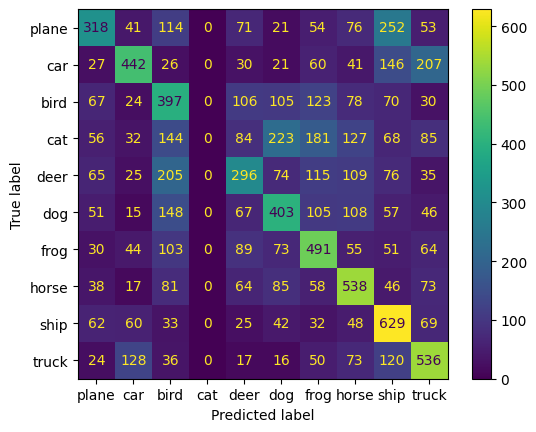

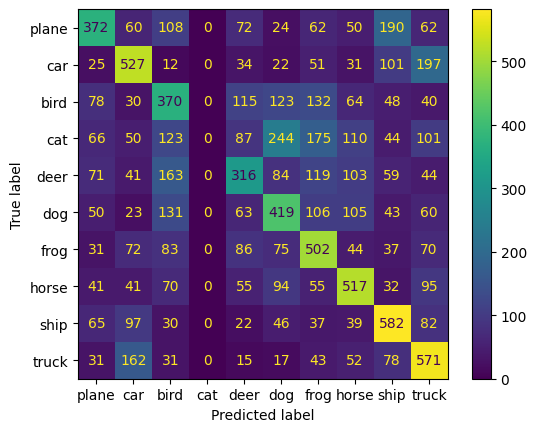

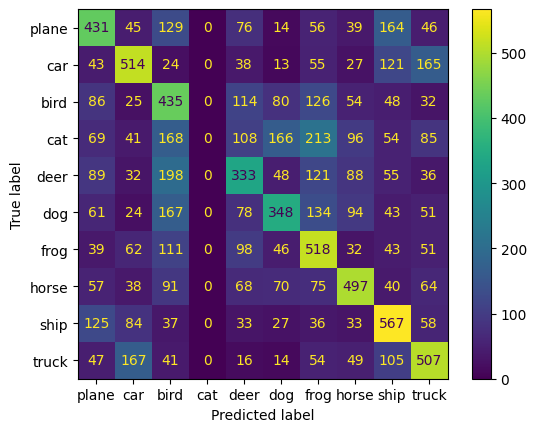

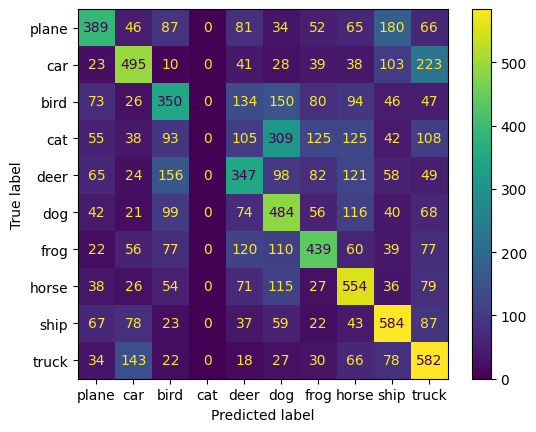

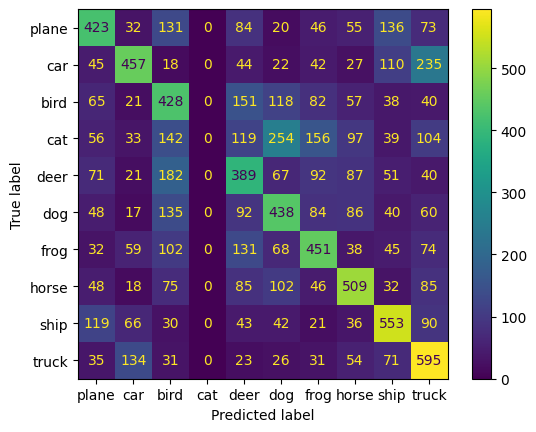

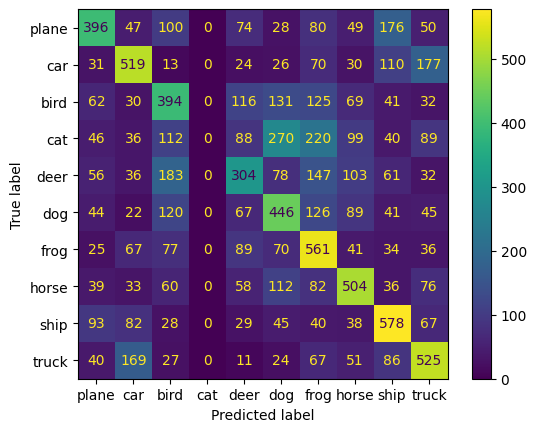

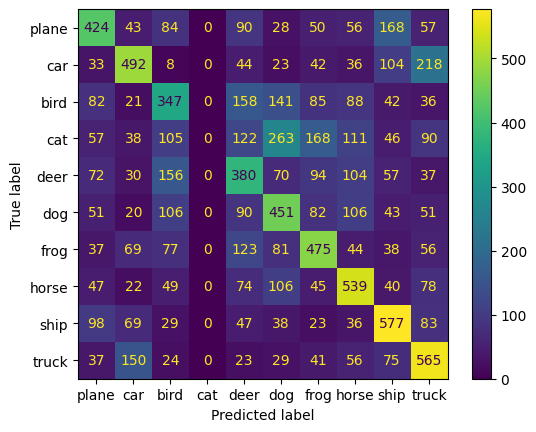

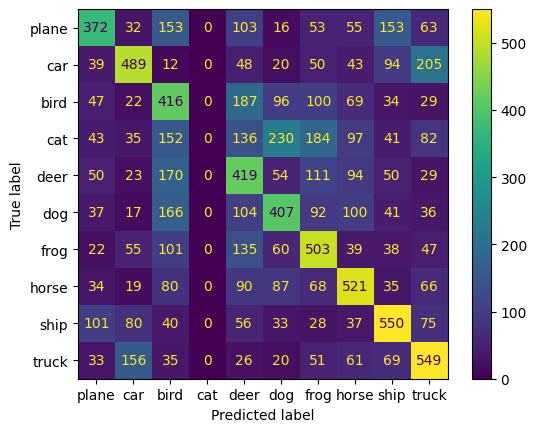

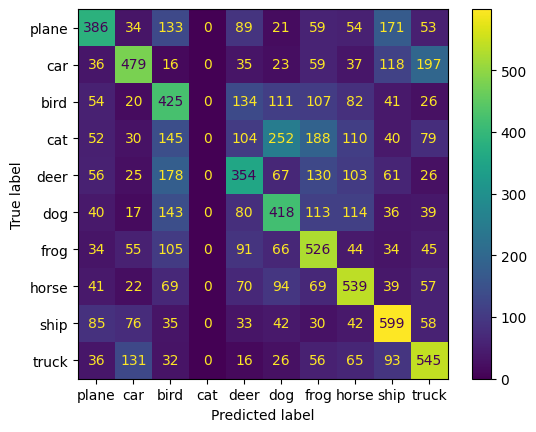

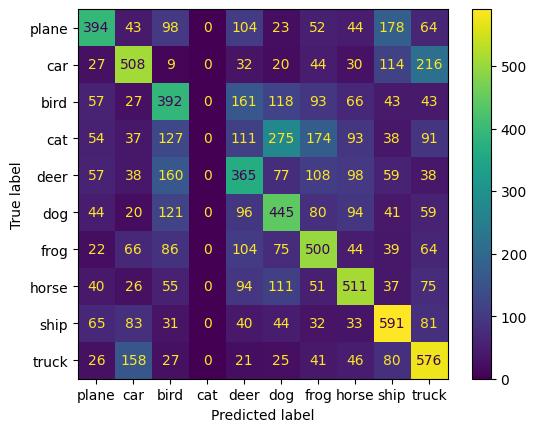

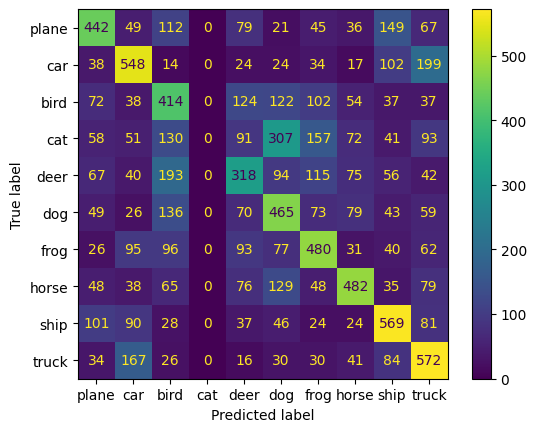

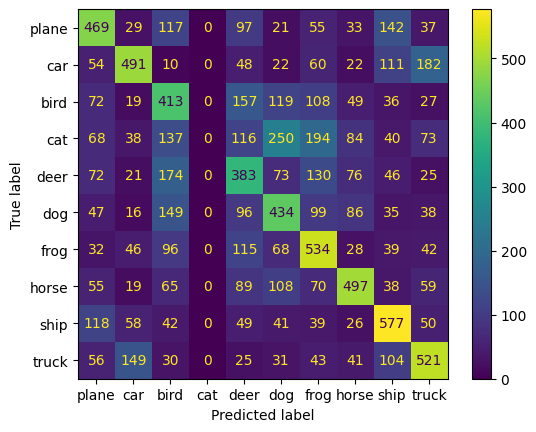

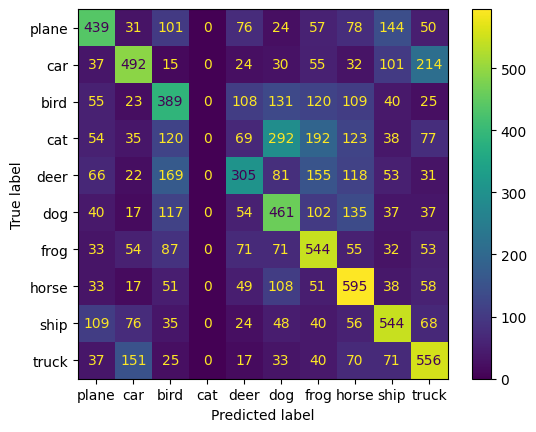

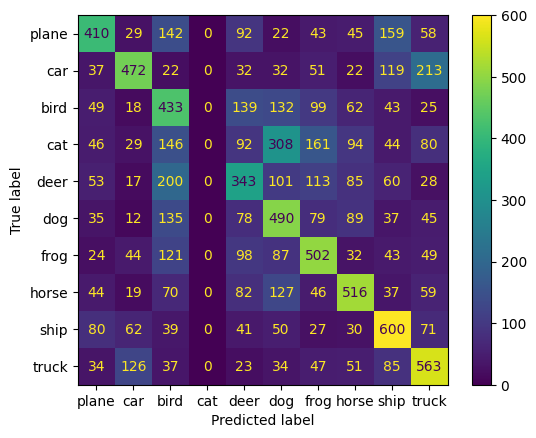

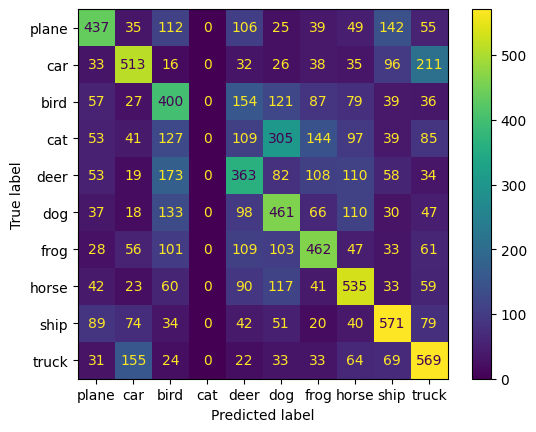

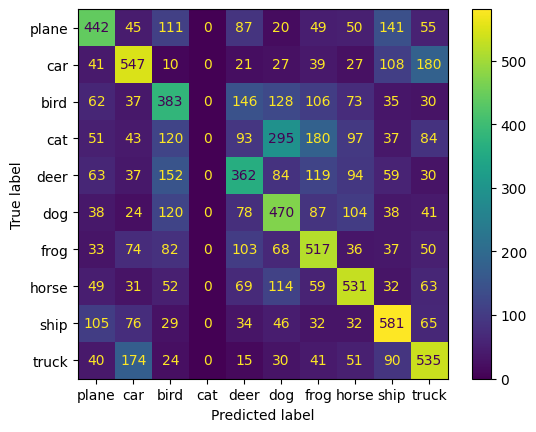

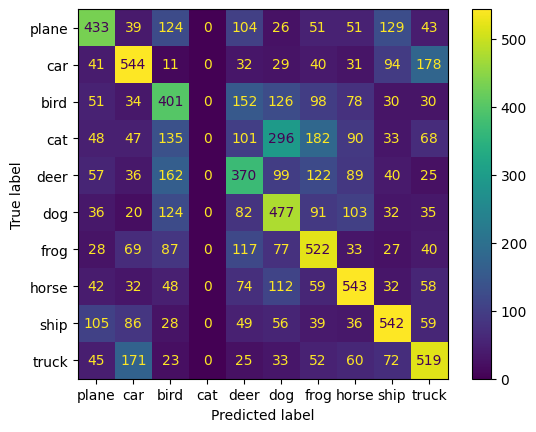

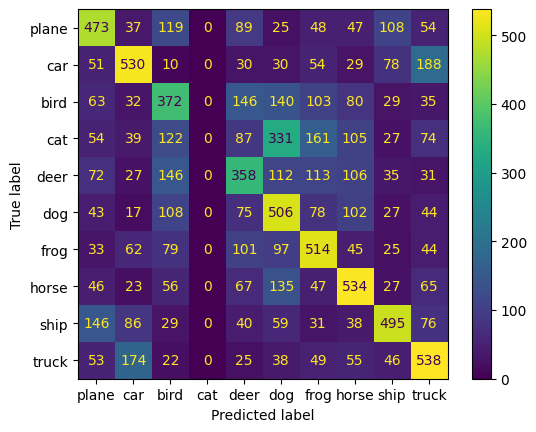

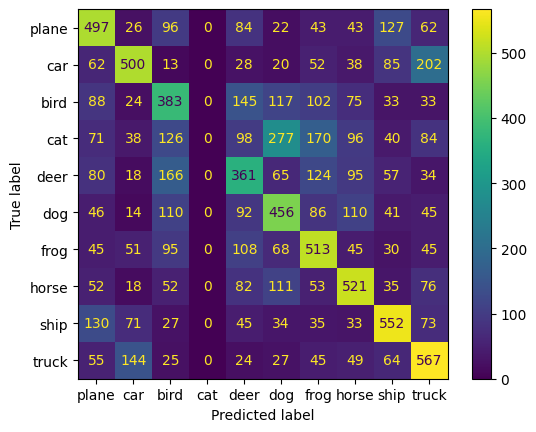

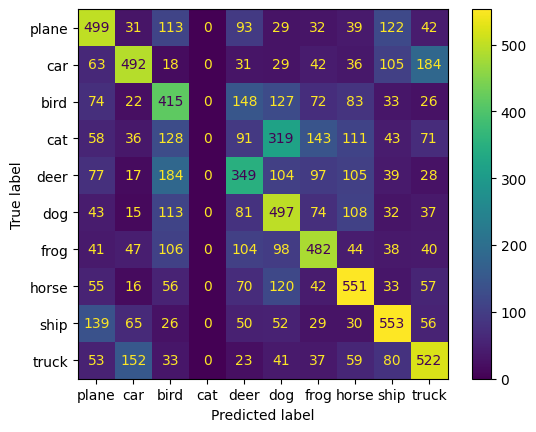

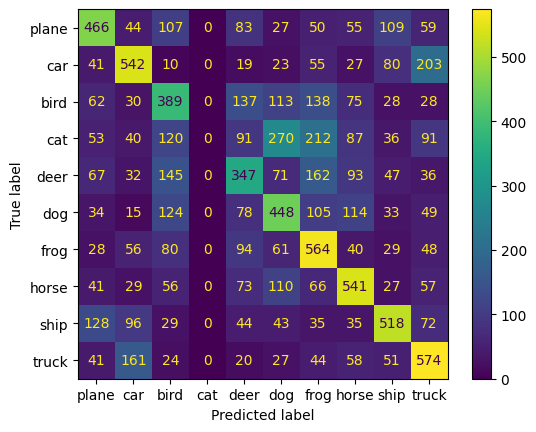

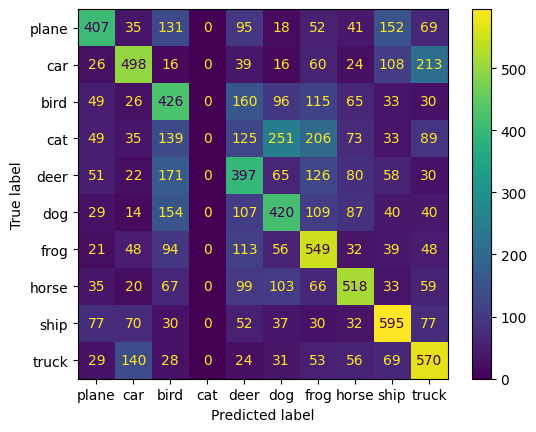

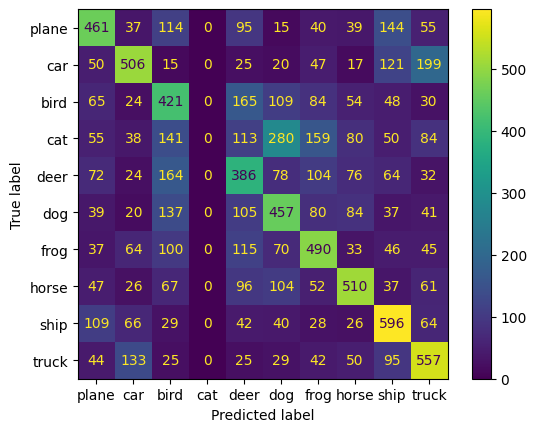

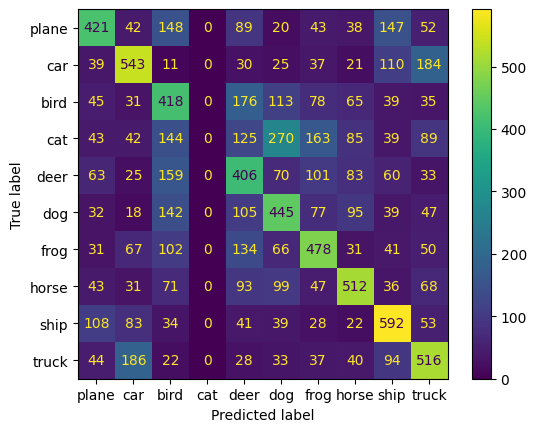

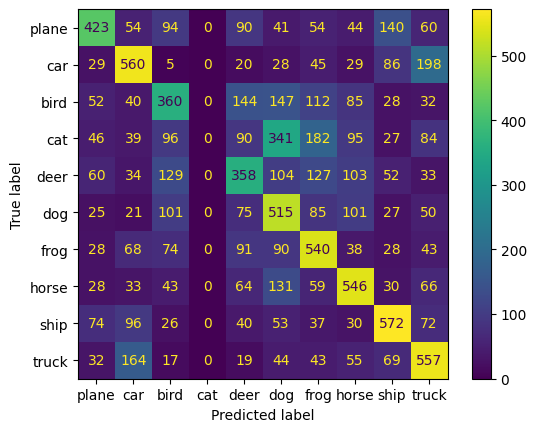

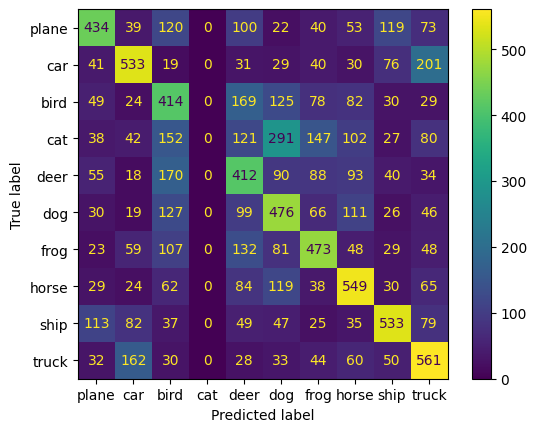

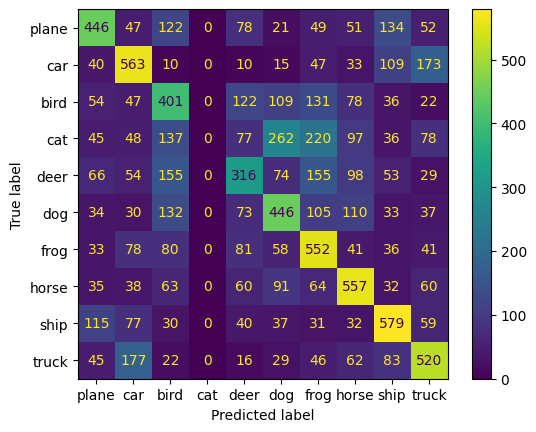

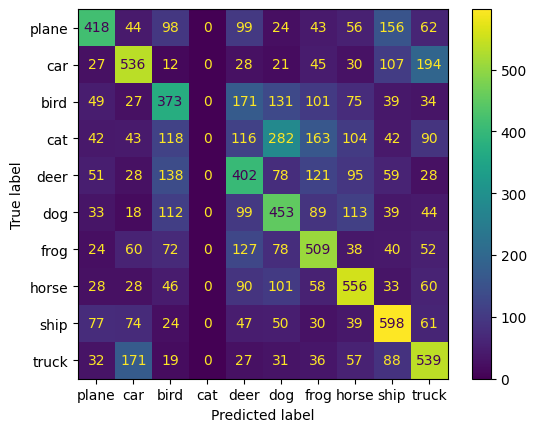

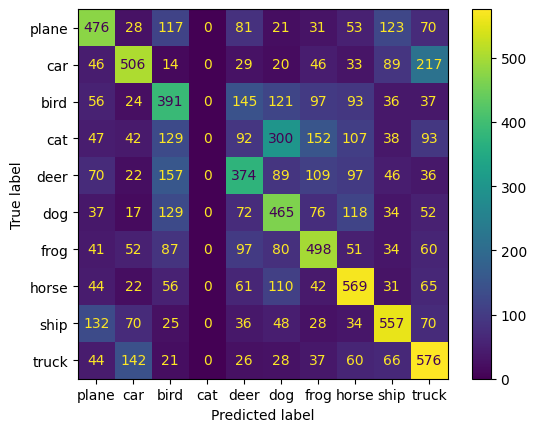

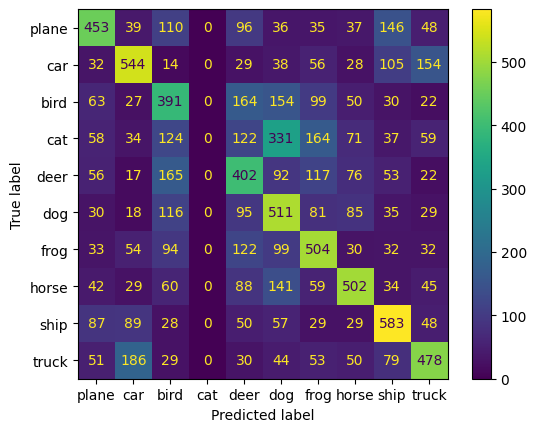

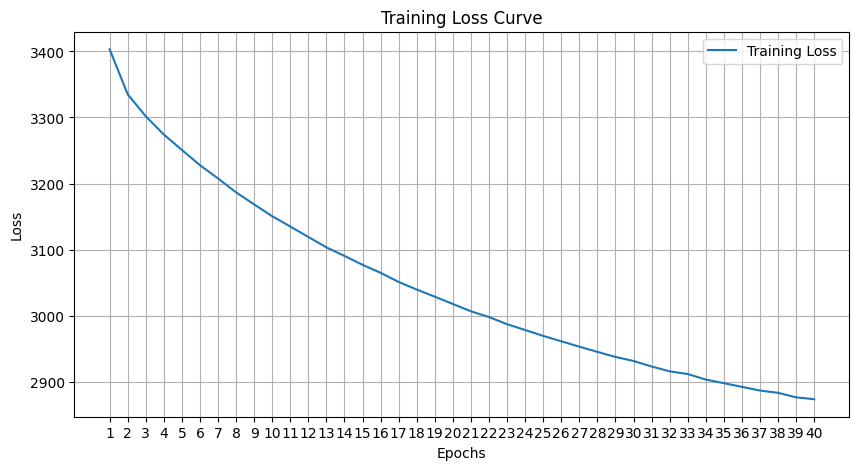

In [6]:
# Lets train a CIFAR10 image classifier
import importlib
import torch
import torch.nn as nn
import numpy as np
import networks as net
import os
import matplotlib.pyplot as plt
importlib.reload(net)

print(torch.cuda.is_available())
pipeline = net.Pipeline()

model = net.CustomMLP().to(pipeline.device)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

home_path = os.path.expanduser("~")
JOB_FOLDER=os.path.join(home_path, "outputs/")
TRAINED_MDL_PATH = os.path.join(JOB_FOLDER, "cifar/mlp/")

import os
os.makedirs(JOB_FOLDER, exist_ok=True)
os.makedirs(TRAINED_MDL_PATH, exist_ok=True)

epochs = 40
trainLossList = []
valAccList = []
for eIndex in range(epochs):
    print("Epoch count: ", eIndex) 
    train_epochloss = pipeline.train_step(model, optimizer)
    val_acc = pipeline.val_step(model)

    print(eIndex, train_epochloss, val_acc)

    valAccList.append(val_acc)
    trainLossList.append(train_epochloss)

    trainedMdlPath = TRAINED_MDL_PATH + f"{eIndex}.pth"
    torch.save(model.state_dict(), trainedMdlPath)

trainLosses = np.array(trainLossList)
testAccuracies = np.array(valAccList)

plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), trainLosses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.xticks(range(1, epochs + 1))
plt.grid(True)
plt.show()

np.savetxt("train.log", trainLosses)
np.savetxt("test.log", testAccuracies)

### Part 3: Implement Convolutional Neural Networks (CNN) Using PyTorch layers

CNNs excel in capturing local patterns and spatial hierarchies through convolutional filters, which makes them more effective for image and spatial data. They also use parameter sharing, reducing the number of parameters and computational cost compared to MLPs. Additionally, CNNs offer translation invariance and hierarchical feature learning, enabling them to recognize features across different spatial locations and build complex patterns efficiently.

Open networks.py and implement `RefCNN` using the inbuilt layers in pytorch. Make sure it is similar to CustomCNN() which uses custom layers.

Train and compare the train loss and validation accuracy against MLP. 

Please copy the best checkpoint file in current folder as cnn_inbuilt.pth for automated tests. It is expected to be higher than 50%.

Files already downloaded and verified
Files already downloaded and verified
Epoch count:  0
train complete
0 3402.8795198202133 32.61
Epoch count:  1
train complete
1 3322.5144550800323 35.01
Epoch count:  2
train complete
2 3285.1304366588593 37.6
Epoch count:  3
train complete
3 3244.901320576668 38.73
Epoch count:  4
train complete
4 3208.935025572777 41.17
Epoch count:  5
train complete
5 3172.591084241867 42.92
Epoch count:  6
train complete
6 3141.413217306137 44.65
Epoch count:  7
train complete
7 3111.73604285717 45.14
Epoch count:  8
train complete
8 3089.5726788043976 46.51
Epoch count:  9
train complete
9 3067.148025035858 47.46
Epoch count:  10
train complete
10 3049.1574137210846 48.13
Epoch count:  11
train complete
11 3031.4170721769333 49.13
Epoch count:  12
train complete
12 3013.9529267549515 48.94
Epoch count:  13
train complete
13 2996.980814099312 49.67
Epoch count:  14
train complete
14 2977.420361995697 50.83
Epoch count:  15
train complete
15 2957.640444278717 5

/home/legoeuro/codeing/junior/rbe474x/.venv/lib/python3.10/site-packages/sklearn/metrics/_plot/confusion_matrix.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


train complete
21 2848.4663492441177 54.17
Epoch count:  22
train complete
22 2832.61275100708 54.42
Epoch count:  23
train complete
23 2814.791672229767 53.87
Epoch count:  24
train complete
24 2800.074338197708 55.37
Epoch count:  25
train complete
25 2783.544488310814 55.54
Epoch count:  26
train complete
26 2770.6457135677338 55.06
Epoch count:  27
train complete
27 2756.8470318317413 55.83
Epoch count:  28
train complete
28 2742.2028185129166 55.82
Epoch count:  29
train complete
29 2731.628389954567 55.78
Epoch count:  30
train complete
30 2720.4363462924957 56.32
Epoch count:  31
train complete
31 2706.4825559854507 55.71
Epoch count:  32
train complete
32 2697.2231899499893 55.89
Epoch count:  33
train complete
33 2686.2061343193054 56.18
Epoch count:  34
train complete
34 2677.322170853615 56.24
Epoch count:  35
train complete
35 2668.3492629528046 56.52
Epoch count:  36
train complete
36 2659.9649777412415 56.38
Epoch count:  37
train complete
37 2650.803198337555 57.25
Epoch

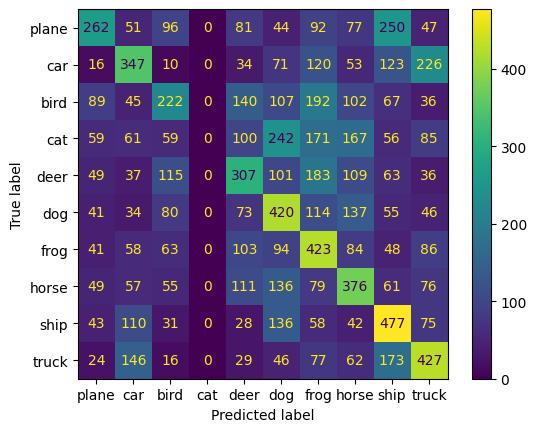

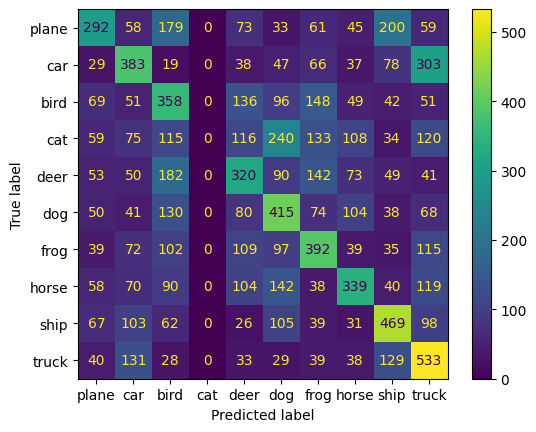

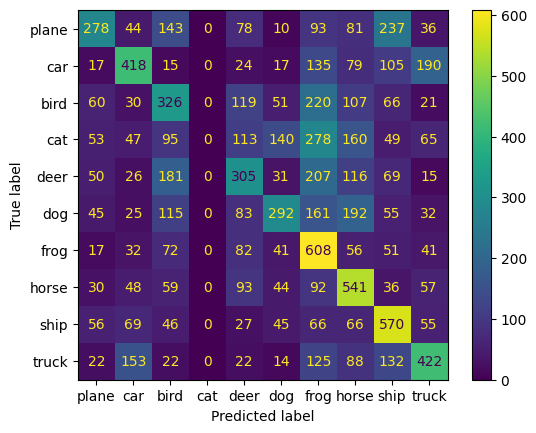

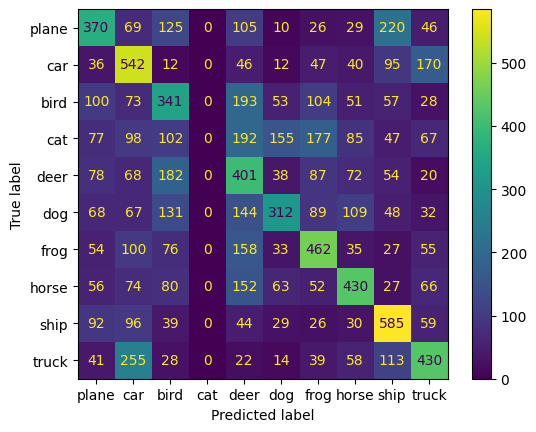

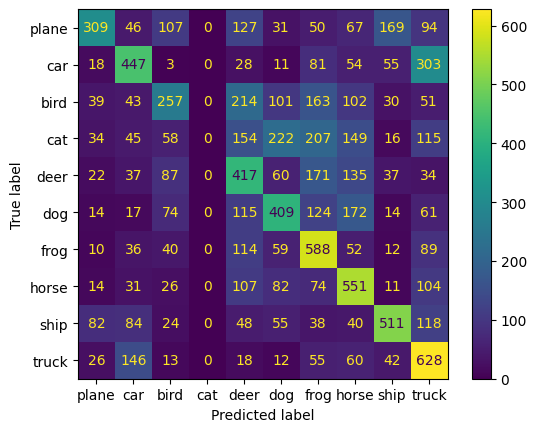

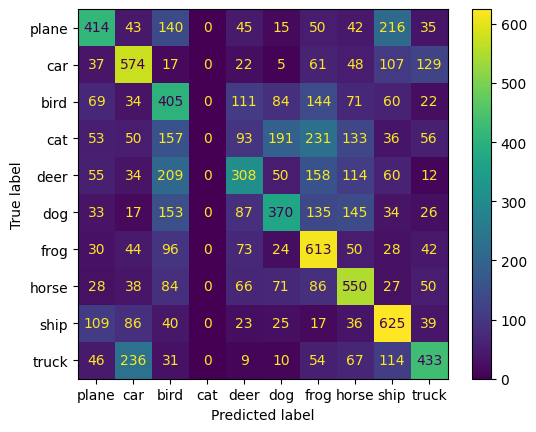

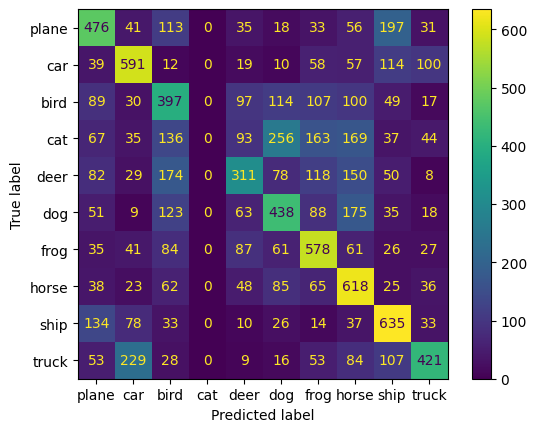

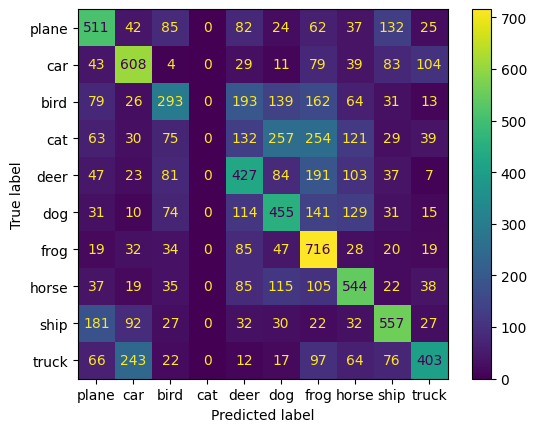

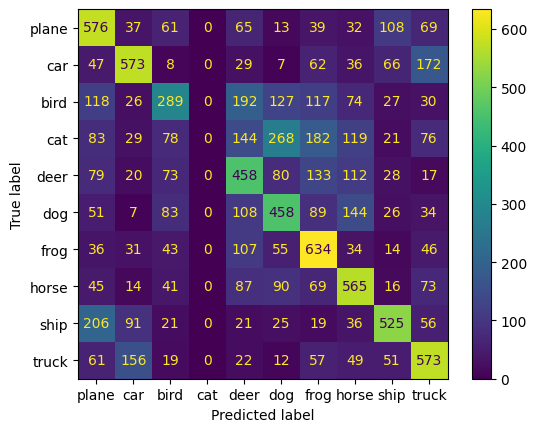

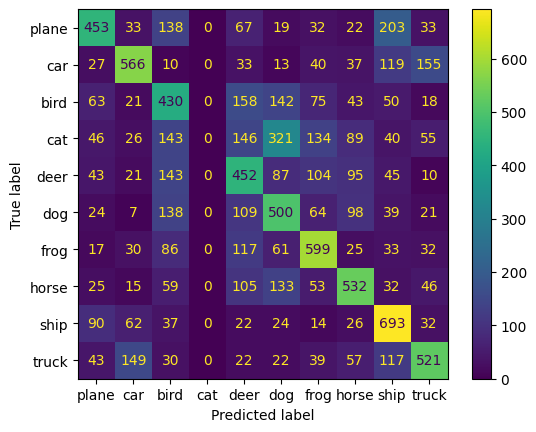

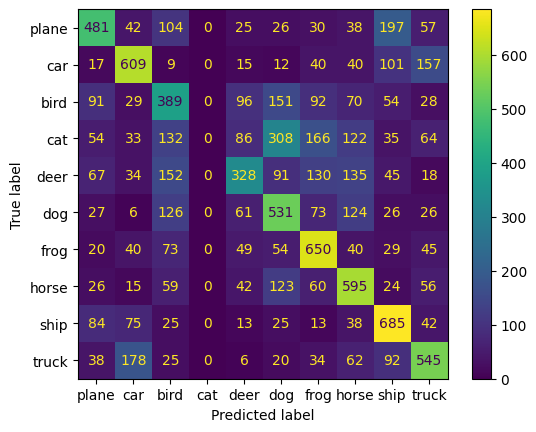

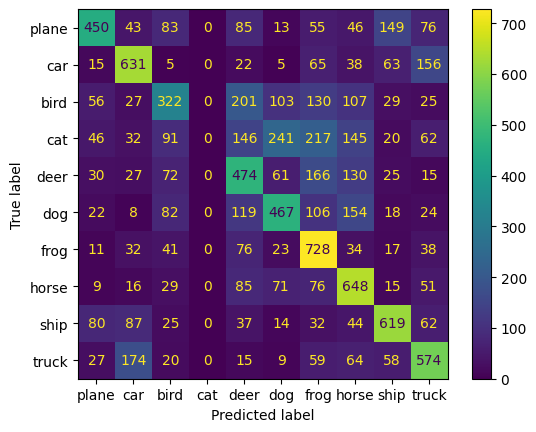

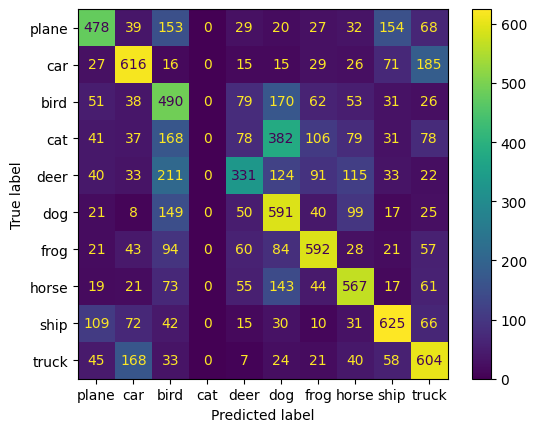

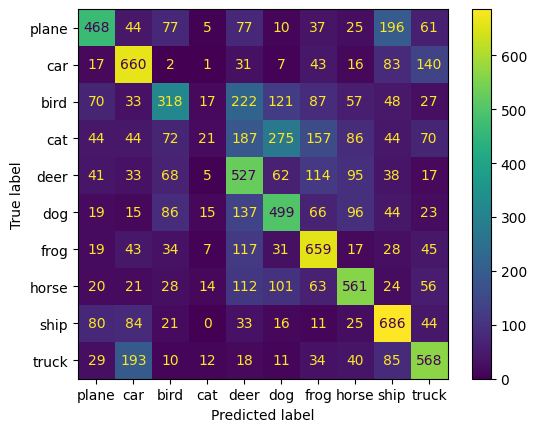

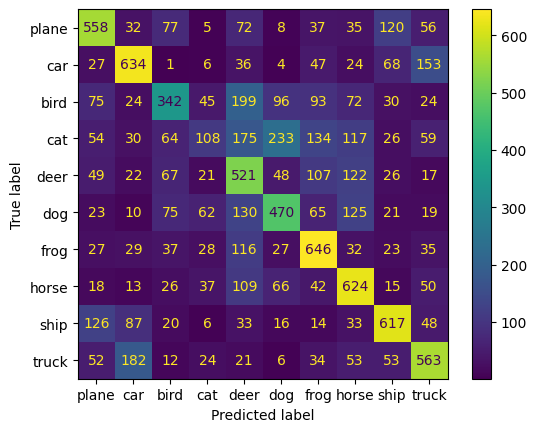

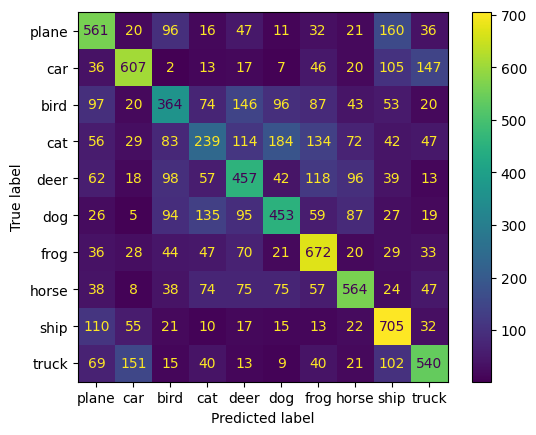

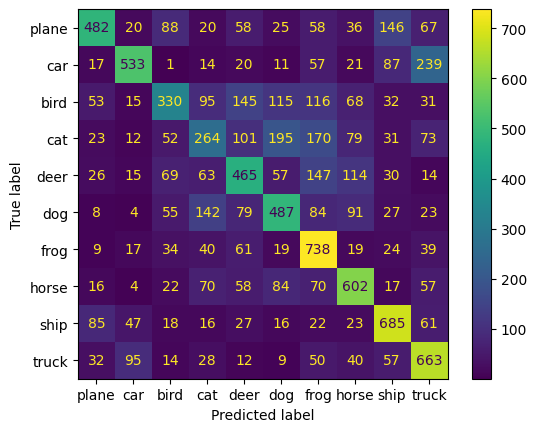

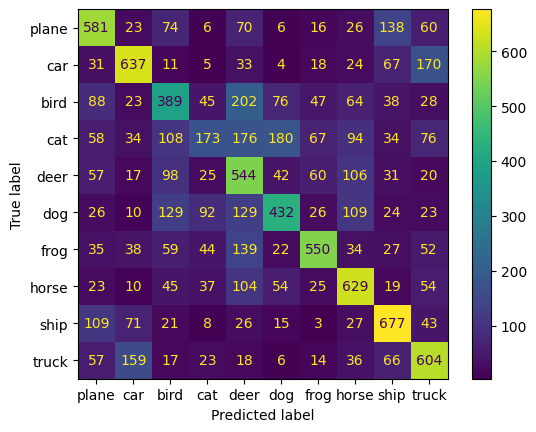

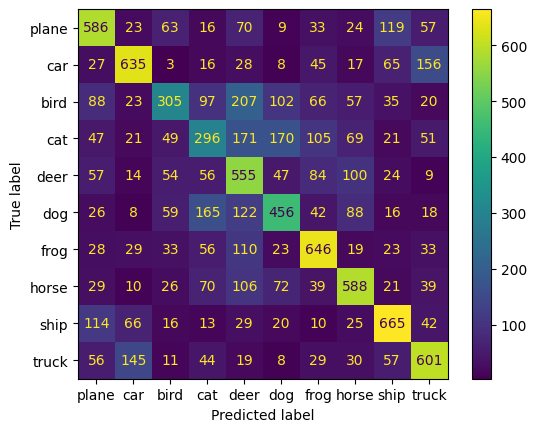

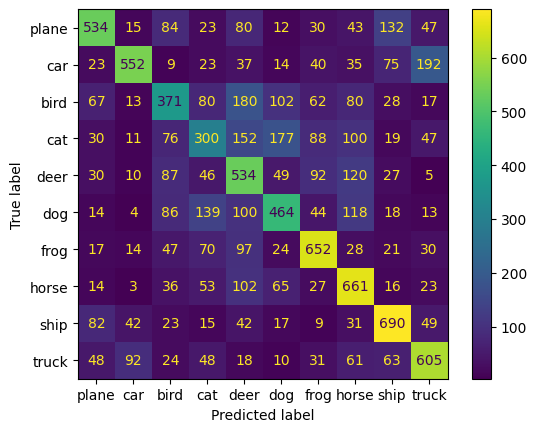

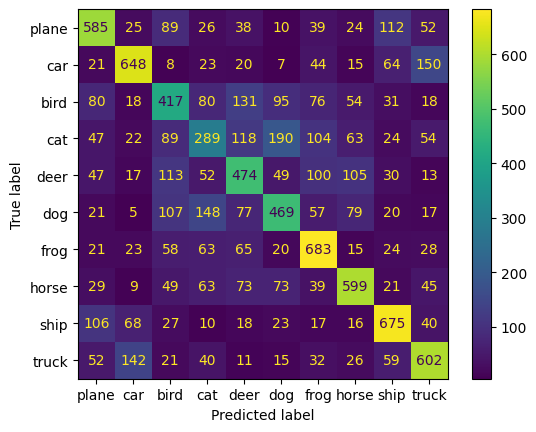

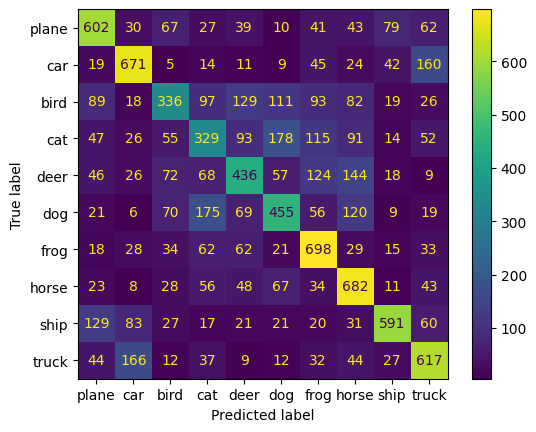

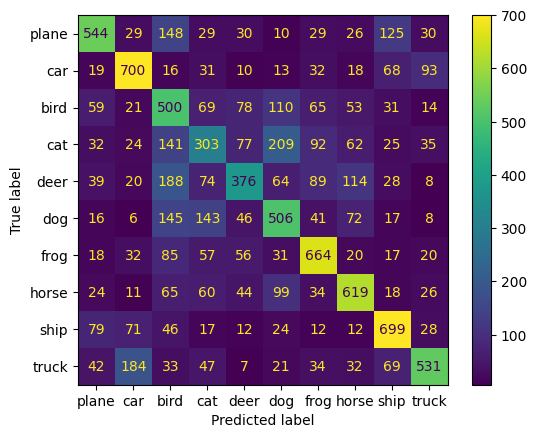

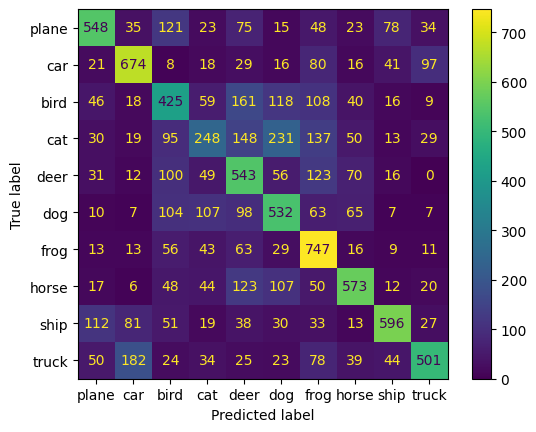

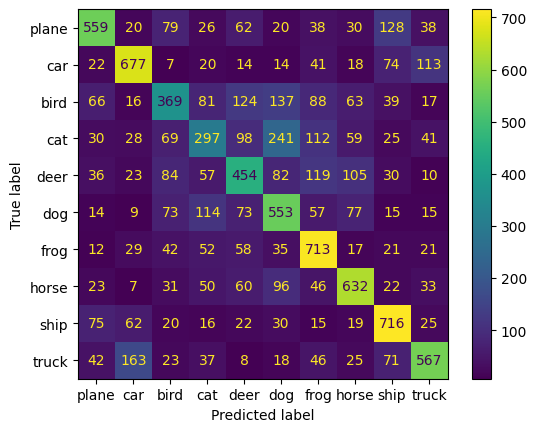

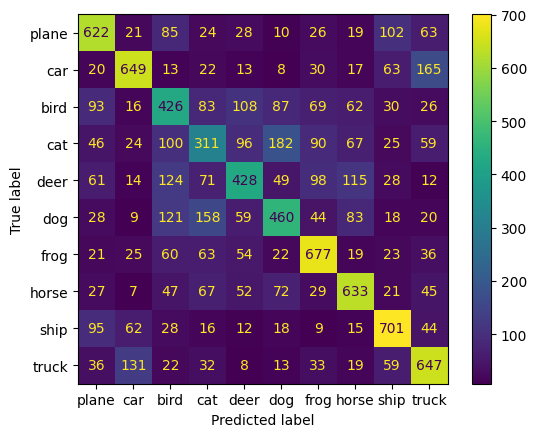

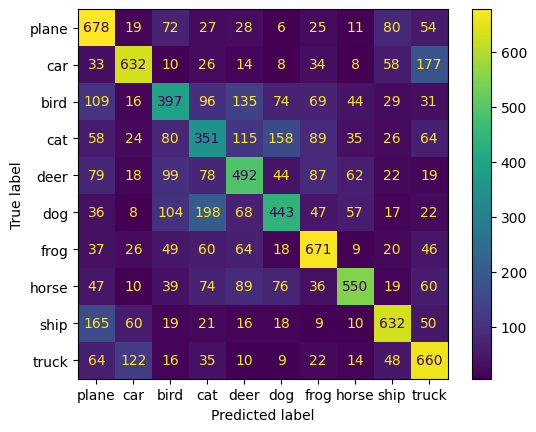

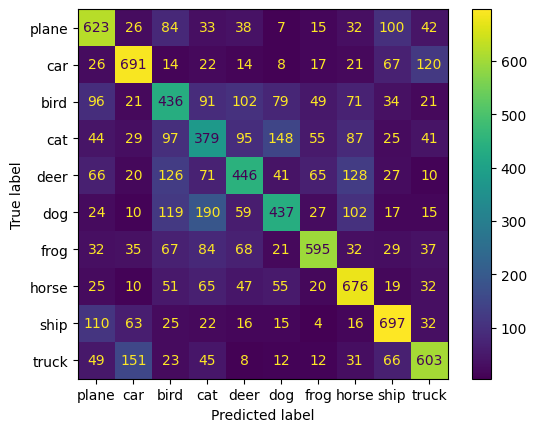

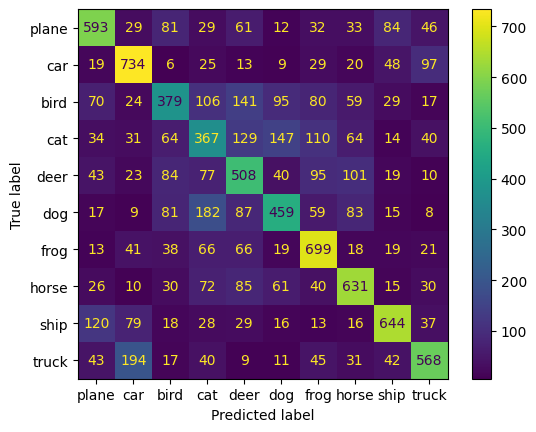

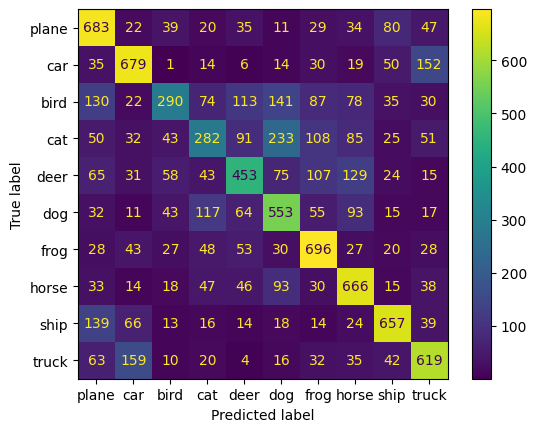

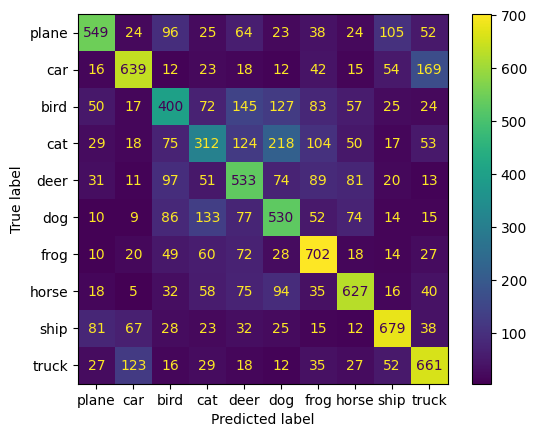

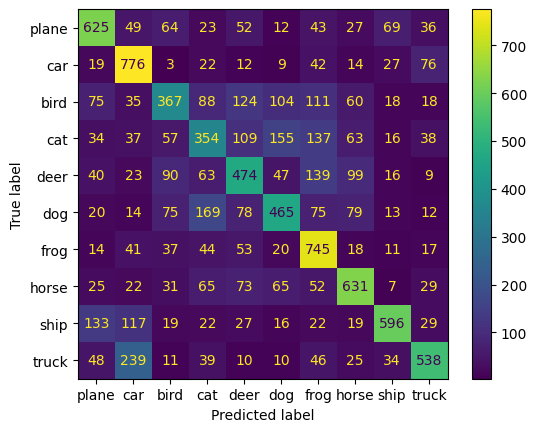

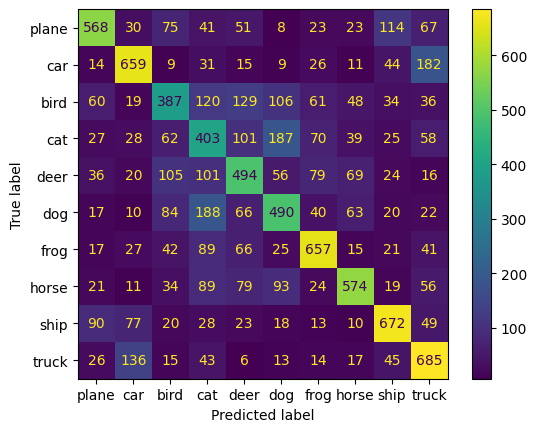

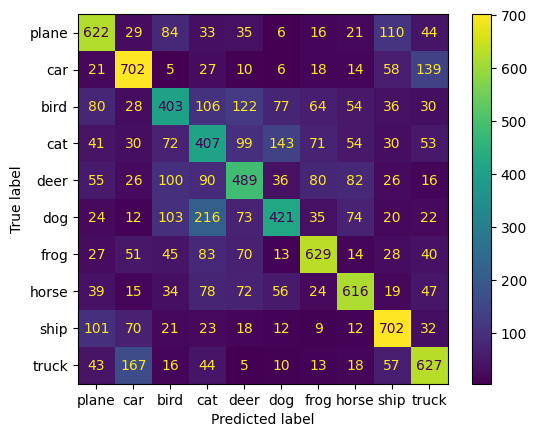

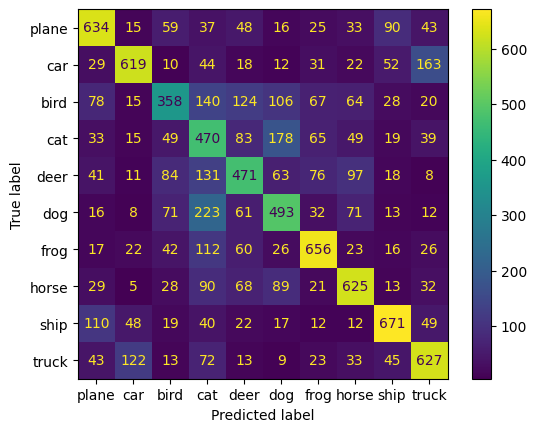

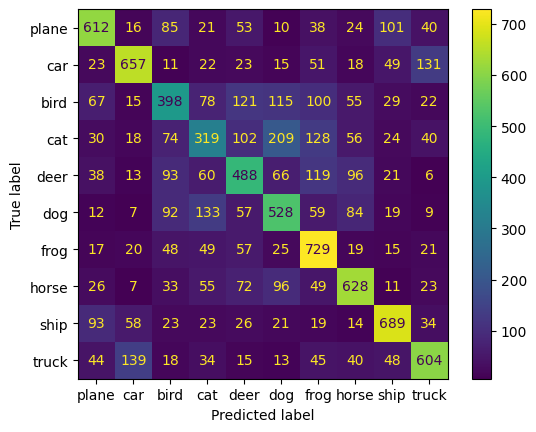

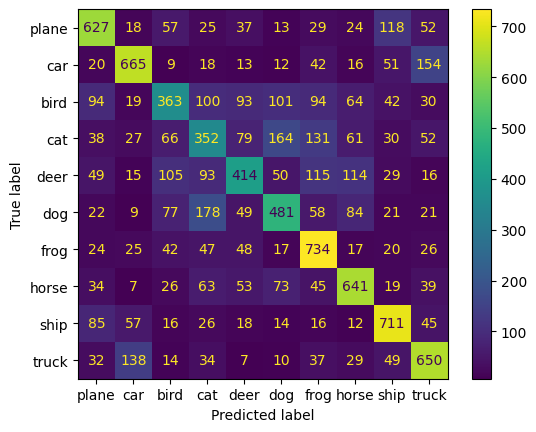

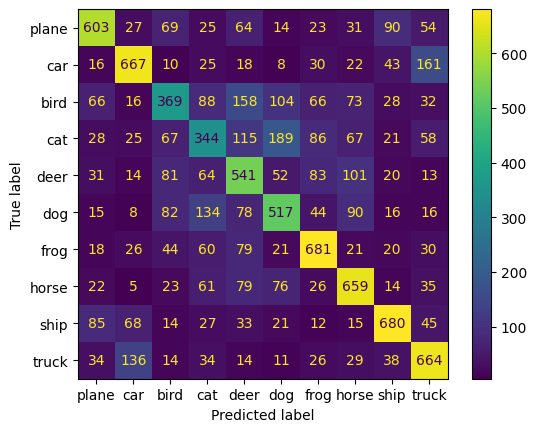

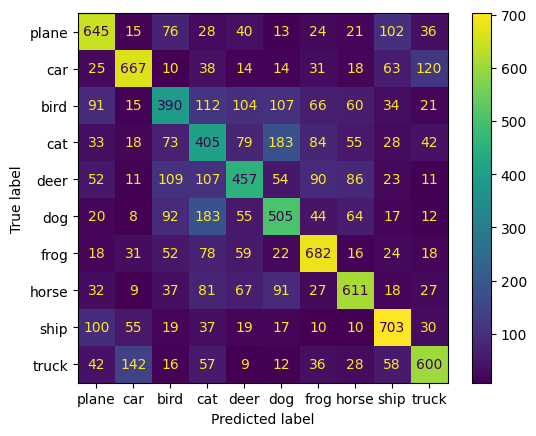

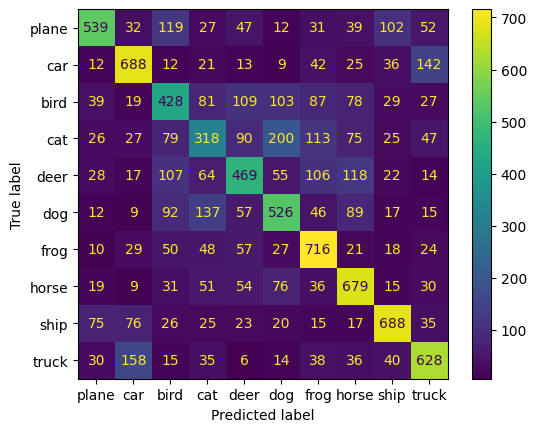

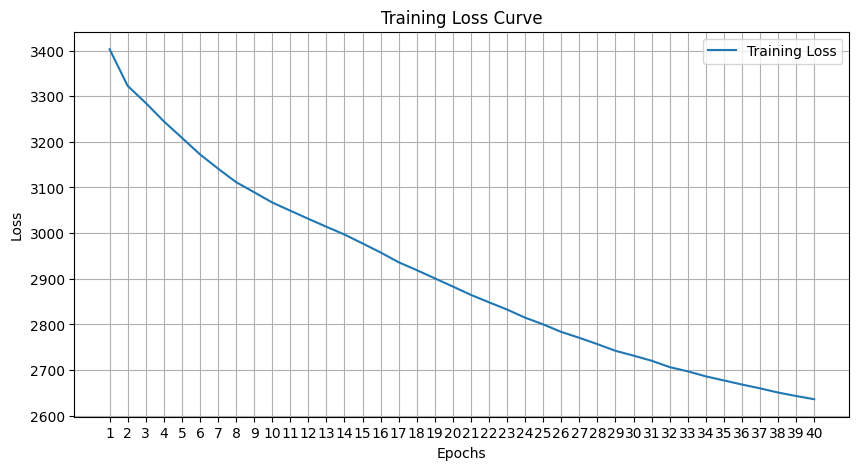

In [8]:
# Lets train a CIFAR10 image classifier
import importlib
import torch
import torch.nn as nn
import numpy as np
import networks as net
import os
importlib.reload(net)

pipeline = net.Pipeline()
model = net.RefCNN().to(pipeline.device)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

home_path = os.path.expanduser("~")
JOB_FOLDER=os.path.join(home_path, "outputs/")
TRAINED_MDL_PATH = os.path.join(JOB_FOLDER, "cifar/cnn_inbuilt_layers/")

import os
os.makedirs(JOB_FOLDER, exist_ok=True)
os.makedirs(TRAINED_MDL_PATH, exist_ok=True)

epochs = 40
trainLossList = []
valAccList = []
for eIndex in range(epochs):
    print("Epoch count: ", eIndex)
    
    train_epochloss = pipeline.train_step(model, optimizer)
    print("train complete")
    val_acc = pipeline.val_step(model)

    print(eIndex, train_epochloss, val_acc)

    valAccList.append(val_acc)
    trainLossList.append(train_epochloss)

    trainedMdlPath = TRAINED_MDL_PATH + f"{eIndex}.pth"
    torch.save(model.state_dict(), trainedMdlPath)

trainLosses = np.array(trainLossList)
testAccuracies = np.array(valAccList)

plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), trainLosses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.xticks(range(1, epochs + 1))
plt.grid(True)
plt.show()

np.savetxt("train.log", trainLosses)
np.savetxt("test.log", testAccuracies)


### Part 4: Implement Your Custom Layers for Convolutional Neural Networks (CNN)

Open custom_layers.py and implement the CustomConvLayer.

Verify it by running the below code. Feel free to modify the below snippet. But do not modify my test.py

For more information about supplying gradients, please refer to [examples_autograd](https://pytorch.org/tutorials/beginner/examples_autograd/two_layer_net_custom_function.html).

In [59]:
import importlib
import torch
import torch.nn as nn
import numpy as np
import networks as net
import os
importlib.reload(net)

inbuiltLayer = nn.Conv2d(2, 3, 3, stride=2, padding='valid')
customLayer = net.CustomConv2d(2, 3, 3, 2)

inbuiltLayer.weight.data.copy_(customLayer.weight.data)
inbuiltLayer.bias.data.copy_(customLayer.bias.data)

u1 = torch.rand((1, 2, 5, 5), requires_grad=True)
u2 = u1.detach().clone()
u2.requires_grad_()

y1 = inbuiltLayer(u1)
y2 = customLayer(u2)

print("Conv. Inference")
print(y1)
print(y2)

lossFunc = nn.MSELoss()
loss_custom = lossFunc(y2, torch.zeros_like(y2))
loss_in = lossFunc(y1, torch.zeros_like(y1))

loss_in.backward()
loss_custom.backward()

print("gradients of loss relative to the weights")
print(inbuiltLayer.weight.grad)
print(customLayer.weight.grad)
# print(inbuiltLayer.weight.grad / customLayer.weight.grad)

print("gradients of loss relative to the bias")
print(inbuiltLayer.bias.grad)
print(customLayer.bias.grad)

print("gradients of loss relative to the input")
print(u1.grad)
print(u2.grad)


Conv. Inference
tensor([[[[ 2.8335,  0.7377],
          [ 1.7001,  1.1648]],

         [[-7.7356, -2.4510],
          [-2.2436, -4.8565]],

         [[-0.6871,  2.6981],
          [ 1.0443, -0.6890]]]], grad_fn=<ConvolutionBackward0>)
tensor([[[[ 2.8335,  0.7377],
          [ 1.7001,  1.1648]],

         [[-7.7356, -2.4510],
          [-2.2436, -4.8565]],

         [[-0.6871,  2.6981],
          [ 1.0443, -0.6890]]]], grad_fn=<CustomConvLayerBackward>)
torch.Size([1, 2, 5, 5]) 3 2
torch.Size([3, 2, 3, 3]) torch.Size([3, 2, 3, 3])
gradients of loss relative to the weights
tensor([[[[ 0.6583,  0.7288,  0.5923],
          [ 0.5948,  0.7034,  0.4230],
          [ 0.4190,  0.6695,  0.8657]],

         [[ 0.2217,  0.3440,  0.5351],
          [ 0.6452,  0.8107,  0.9362],
          [ 0.1707,  0.7146,  0.4641]]],


        [[[-1.9882, -1.9193, -1.3819],
          [-1.6023, -1.9598, -1.0295],
          [-1.4018, -1.6512, -2.2770]],

         [[-0.7714, -0.7671, -1.5449],
          [-1.8578, -2.3

### Part 5: CNN Network Training

Train and compare the train loss and validation accuracy against MLP and inbuilt conv layers. 

Please copy the best checkpoint file in current folder as `cnn_custom.pth` for automated tests. It is expected to be higher than 50%.

In [ ]:
# Lets train a CIFAR10 image classifier
import importlib
import torch
import torch.nn as nn
import numpy as np
import networks as net
import os
importlib.reload(net)

pipeline = net.Pipeline()
model = net.CustomCNN().to(pipeline.device)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

home_path = os.path.expanduser("~")
JOB_FOLDER=os.path.join(home_path, "outputs/")
TRAINED_MDL_PATH = os.path.join(JOB_FOLDER, "cifar/cnn_custom_layer/")

import os
os.makedirs(JOB_FOLDER, exist_ok=True)
os.makedirs(TRAINED_MDL_PATH, exist_ok=True)

epochs = 40
trainLossList = []
valAccList = []
for eIndex in range(epochs):
    # print("Epoch count: ", eIndex)
    
    train_epochloss = pipeline.train_step(model, optimizer)
    print("train complete")
    val_acc = pipeline.val_step(model)

    print(eIndex, train_epochloss, val_acc)

    valAccList.append(val_acc)
    trainLossList.append(train_epochloss)

    trainedMdlPath = TRAINED_MDL_PATH + f"{eIndex}.pth"
    torch.save(model.state_dict(), trainedMdlPath)

trainLosses = np.array(trainLossList)
testAccuracies = np.array(valAccList)

np.savetxt("train.log", trainLosses)
np.savetxt("test.log", testAccuracies)

## 5. Grading Rubric

- part 1 : 60
- part 2 : 10
- part 3 : 10
- part 4 : 10
- part 5 : 10

For RBE474X: part1 + part2 + part3 = 100% of the grade (80/80).
For RBE595-A01-SP: You are expected to implement part1-part5 for getting full credits (100/100).

Your code will be evaluated with test.py. Please run it and ensure that the tests pass before submitting. Instructions are in software setup section.

Please note that I will replace the test.py with my original test.py before evaluating.

Please do not submit the data folder that is downloaded while training the network. It is over 300 MB. Anyone submitting data will be penalized! Your submission should not be more than 20 MB.

## 6. Report Guidelines

Report must be in Latex.

Include the following,

1. Training loss curve (loss vs epoch count)
2. Confusion Matrix for validation set (val_step)
3. Accuracy comparison between MLP, CNN (torch layers) and CNN (custom_layers)
